## Analysis of Credit Card Detection 

Up until now I have always used R for my data analysis. I found it easier to start with than Python and the language more familiar. However after evaluating various courses available for data science, I see that Python is often the recommended language for data analysis. So this is my first attempt at using Python for an analysis. 

This analysis is based on the [Credit Card Data](https://www.google.com) set off of Kaggle. Essentially we had to build a model to determine whether a transaction was fraudulent or not. Unfortunately, due to privacy concerns, the variables for the model were anonymous. I find a lot of the relationships I identify, start by me considering what could be related, when you don't know it becomes a little harder. 

There are a few different models I would like to test. But first I'll start with the normal logistic regression for this classification model. 


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

%matplotlib inline

After importing our libraries, we are going to import the csv file. 

In [6]:
data = pd.read_csv('creditcard.csv', header = 0)
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


col_0,Count
Class,
0,99.827251
1,0.172749


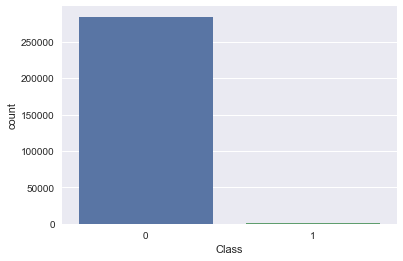

In [33]:
data["Class"] = data["Class"].astype('category')
sns.countplot(x="Class", data=data)
FraudulentDist = pd.crosstab(index =data["Class"],columns = "Count" )
FraudulentDist/FraudulentDist.sum()*100

This shows us that 99.83% of all transactions are valid transactions and only 0.1727% are fraudulent. 

The problem this presents is that we will have a highly skewed model which will predict that most transactions will be valid, and it will seem accurate as if you guess 99% of the time that the transaction is valid, you are likely to be correct (99.83% of the time). However it is highly unlikely that you will be able predict that fraudulent transaction very accurately. 

So while our model may be ACCURATE, this is not a reliable measure to determine how efficient our model is. 

Remember accuracy is the total of correctly predicted records, divided by the total number of records. If we assume every single record to be valid for example, our classifier will by 99.83% accurate because 99.83% of the time, the transaction will be valid. But this is of no use to us as we need to determine when the transaction wil be INVALID. 

The Precision on the other hand is the measure of how accurately we predicted a record would be fraudulent: It is the number of correctly predicted fraudulent transactions/(correctly predicted fraudulent + incorrectly predicted fraudulent). Our precision with this skewed data may be misleading as it is likely we will have very few records here and may have none incorrectly predicted as fraudulent and a 100% precision rate. 

TP/(TP + FP) 

The recall will be an important measure, as it will look at out of the fraudulent transactions alone, how many were correctly predicted. 

TP/(TP + FN)